In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import openpyxl
import numpy as np
import matplotlib.colors as mcolors

In [2]:
dataset_path = 'Datasets/Dataset_BA1B.xlsx'

df = pd.read_excel(dataset_path)
# df.dropna(inplace=True)
# df['TOP_DEPTH'].fillna(method='ffill', inplace=True)
[c for c in df.columns]
geology_columns = ['UNIT_TYPE_Dunite',
 'UNIT_TYPE_Fault rock',
 'UNIT_TYPE_Gabbro',
 'UNIT_TYPE_Harzburgite',
 'UNIT_TYPE_Metagabbro',
 'UNIT_TYPE_Other',
'TOP_DEPTH'
 # 'UNIT_CLASS_OPHIO',
 # 'UNIT_CLASS_UND',
                  ]

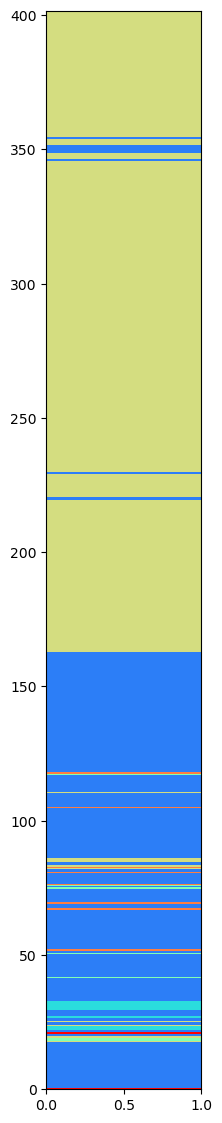

In [3]:
fig, ax = plt.subplots(figsize=(2, 14))
geo_df = df[geology_columns].copy()
geo_df.dropna(inplace=True)

Zs = []

for n, c in enumerate(geology_columns[:-1]):
    n = n + 1
    z = np.vstack(geo_df[c].values*n)
    Zs.append(z)

Z = np.zeros_like(z)
for z in Zs:
    Z += z
    
x = np.array([0, 1])
y = np.vstack(geo_df['TOP_DEPTH'].values)
xx, yy = np.meshgrid(x, y)
    
ax.pcolormesh(xx, yy, Z[:-1], vmin=0, vmax=6, cmap='rainbow', shading='auto')

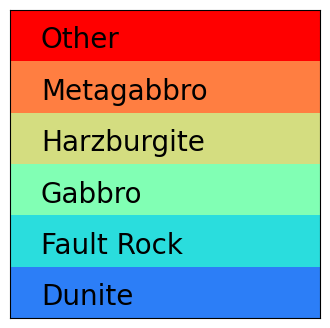

In [61]:
fig, ax = plt.subplots(figsize=(4,4))
ax.pcolormesh(np.vstack([1, 2, 3, 4, 5, 6]), cmap='rainbow', vmin=0, vmax=6)
ax.text(s='Dunite', x=0.1, y=0.25, fontsize=20)
ax.text(s='Fault Rock', x=0.1, y=1.25, fontsize=20)
ax.text(s='Gabbro', x=0.1, y=2.25, fontsize=20)
ax.text(s='Harzburgite', x=0.1, y=3.25, fontsize=20)
ax.text(s='Metagabbro', x=0.1, y=4.25, fontsize=20)
ax.text(s='Other', x=0.1, y=5.25, fontsize=20)
# ax.set_xlim(0, 0.6)
ax.set_yticks([])
ax.set_xticks([])
fig.savefig('geology_legend.pdf', bbox_inches='tight')

# Figure 2
*NOTE: figure 1 is a process diagram*

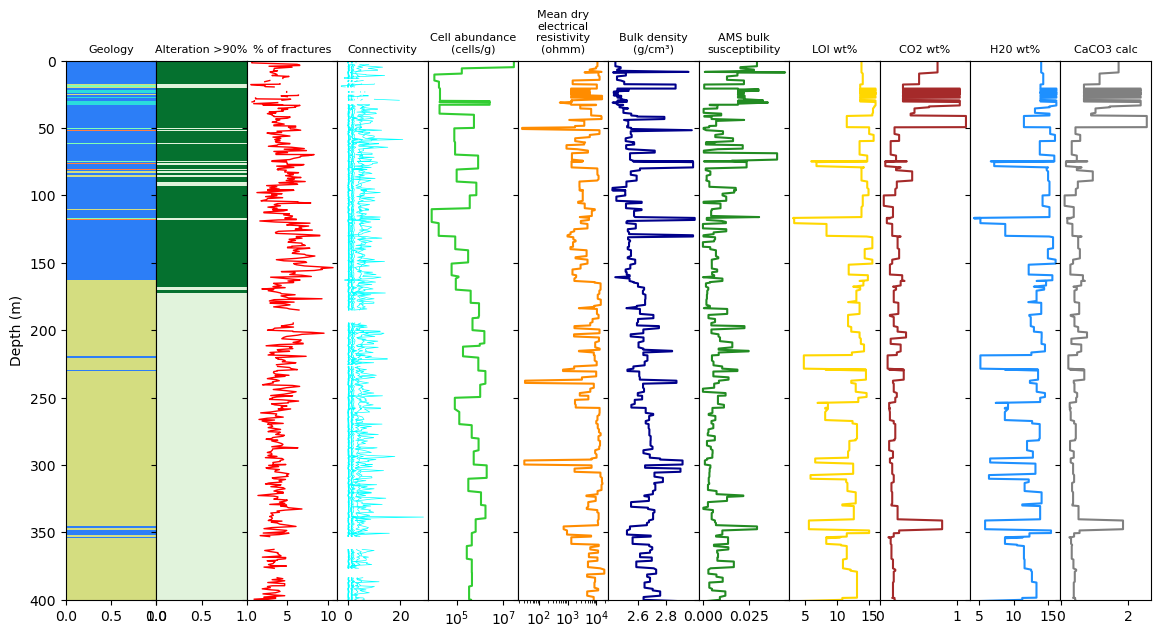

In [60]:
fig2_cols = ['Cell abundance (cells/g)',
 'Mean dry electrical Resistivity (ohmm)',
 'Bulk density (g/cm³)',
 'AMS bulk susceptibility',
 'LOI wt%',
 'CO2 wt%',
 'H20 wt%',
 'CaCO3 calc',
'% of fractures',
'TOP_DEPTH',
'ALTERATION',
'PnS2_sum',
 'PnL_sum',
 'PnP3V_sum',
 'PnP3H_sum',
 'PnP4_sum',
 'PnP6V_sum',
 'FnS2_sum',
 'FnL_sum',
 'FnP3V_sum',
 'FnP3H_sum',
 'FnP4_sum',
 'FnP6V_sum',
'Alteration_dummies_50%-90%',
 'Alteration_dummies_>90%',]

connectivity = ['PnS2_sum',
 'PnL_sum',
 'PnP3V_sum',
 'PnP3H_sum',
 'PnP4_sum',
 'PnP6V_sum',
 'FnS2_sum',
 'FnL_sum',
 'FnP3V_sum',
 'FnP3H_sum',
 'FnP4_sum',
 'FnP6V_sum',]

fig2_df = df[fig2_cols].copy()
fig2_df.sort_values(by='TOP_DEPTH', inplace=True)
fig, ax = plt.subplots(1, 12, figsize=(14, 7), sharey=True)

y = fig2_df.TOP_DEPTH
   
ax[0].pcolormesh(xx, yy, Z[:-1], vmin=0, vmax=6, cmap='rainbow', shading='auto')
ax[0].set_title('Geology', fontsize=8)

alt_df = fig2_df[['Alteration_dummies_>90%', 'TOP_DEPTH']].copy()
alt_df.dropna(inplace=True)

ax[1].pcolormesh(xx, yy, np.vstack(alt_df['Alteration_dummies_>90%'].values)[:-1], cmap='Greens', vmin=-0.2, vmax=1.2)
ax[1].set_title('Alteration >90%', fontsize=8)

ax[2].plot(fig2_df['% of fractures'], y, color='red', linewidth=1)
ax[2].set_title('% of fractures', fontsize=8)

for c in connectivity:
    ax[3].plot(fig2_df[c], y, color='cyan', linewidth=0.5)
ax[3].set_title('Connectivity', fontsize=8)
    
ax[4].plot(fig2_df['Cell abundance (cells/g)'], y, color='limegreen')
ax[4].set_xscale('log')
ax[4].set_title('Cell abundance\n(cells/g)', fontsize=8)

ax[5].plot(fig2_df['Mean dry electrical Resistivity (ohmm)'], y, color='darkorange')
ax[5].set_xscale('log')
ax[5].set_title('Mean dry\nelectrical\nresistivity\n(ohmm)', fontsize=8)

ax[6].plot(fig2_df['Bulk density (g/cm³)'], y, color='darkblue')
ax[6].set_title('Bulk density\n(g/cm³)', fontsize=8)
ax[6].set_xticks([2.6, 2.8])

ax[7].plot(fig2_df['AMS bulk susceptibility'], y, color='forestgreen')
ax[7].set_title('AMS bulk\nsusceptibility', fontsize=8)

ax[8].plot(fig2_df['LOI wt%'], y, color='gold')
ax[8].set_title('LOI wt%', fontsize=8)

ax[9].plot(fig2_df['CO2 wt%'], y, color='brown')
ax[9].set_title('CO2 wt%', fontsize=8)

ax[10].plot(fig2_df['H20 wt%'], y, color='dodgerblue')
ax[10].set_title('H20 wt%', fontsize=8)

ax[11].plot(fig2_df['CaCO3 calc'], y, color='grey')
ax[11].set_title('CaCO3 calc', fontsize=8)

# ax[0].set_ylim(405, -5)
ax[0].set_ylabel('Depth (m)')
fig.subplots_adjust(wspace=0, hspace=0)
ax[0].set_ylim(400, 0)

# plt.tight_layout()
fig.savefig('physical_measurements.pdf', bbox_inches='tight')

# Figure 3

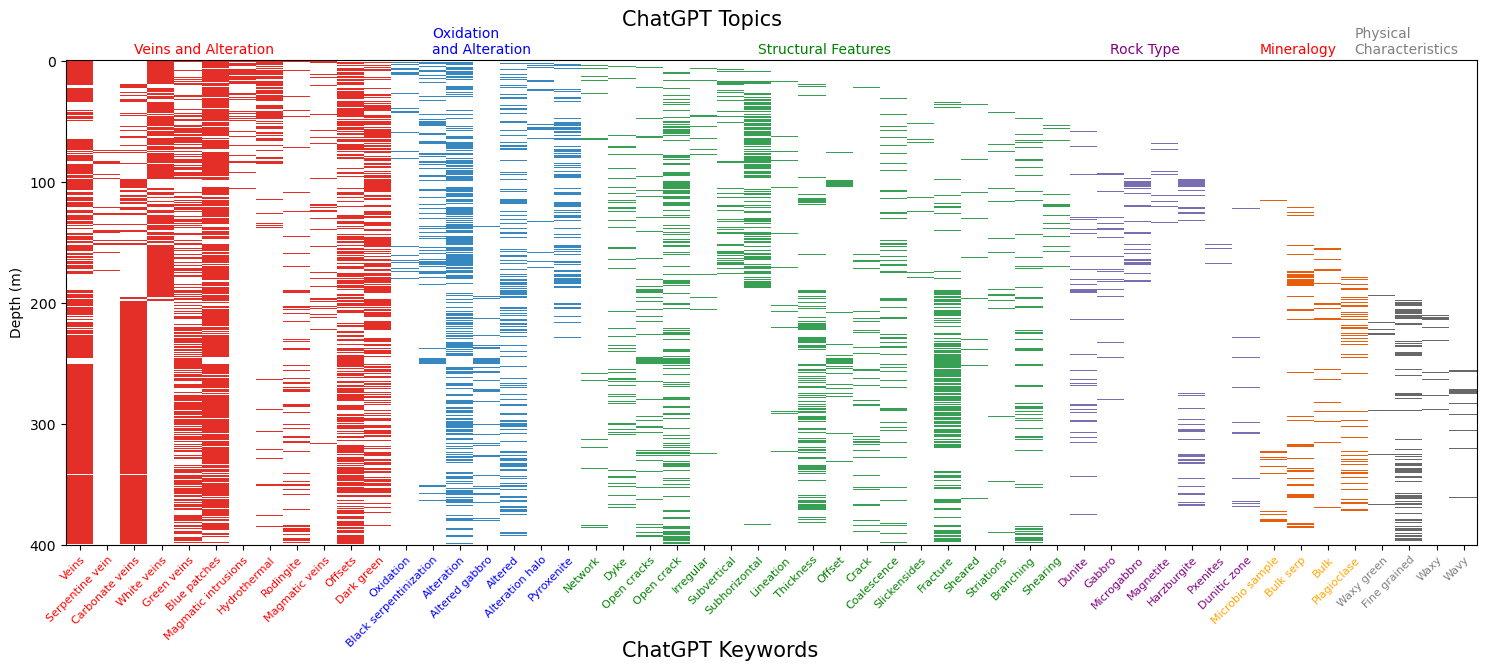

In [59]:
keywords=df.columns[49:]
K=[]
for i in keywords:
    K.append(i)

# plot the graph keyword.

data = df[K].to_numpy()
# row_labels = L
row_labels = df.index
col_labels = K

groups = [
    ['Veins', 'Serpentine vein', 'Carbonate veins', 'White veins', 'Green veins',
     'Blue patches', 'Magmatic veins', 'Dark green', 'Magmatic intrusions',
     'Hydrothermal', 'Offsets', 'Rodingite'],
    ['Oxidation', 'Black serpentinization', 'Alteration', 'Alteration halo',
     'Altered gabbro', 'Altered', 'Pyroxenite'],
    ['Network', 'Coalescence', 'Dyke', 'Shearing', 'Crack',  'Open cracks', 'Open crack', 'Irregular', 'Subvertical',
     'Subhorizontal', 'Lineation', 'Thickness', 'Offset', 'Fracture',
     'Sheared', 'Striations', 'Branching', 'Slickensides'],
    ['Dunite', 'Gabbro', 'Microgabbro', 'Harzburgite', 'Pxenites', 'Dunitic zone','Magnetite'],
    ['Plagioclase', 'Microbio sample', 'Bulk serp', 'Bulk'],
    ['Fine grained', 'Waxy green', 'Waxy', 'Wavy']
]

colors = ['red', 'blue', 'green', 'purple', 'orange', 'grey']


sorted_cols = []
group_indices = []
for i, group in enumerate(groups):
    for col in col_labels:
        if col in group:
            sorted_cols.append(col)
            group_indices.append(i)

sorted_data = data[:, [col_labels.index(col) for col in sorted_cols]]

# plt.pcolormesh(sorted_data, cmap='Purples')

fig, ax = plt.subplots(figsize=(15, 7))

def plot_words(x, y, data, cmap):
    xx, yy = np.meshgrid(x, y)
    data[data == 0] = np.nan
    ax.pcolormesh(xx, yy, data, cmap=cmap, vmin=0, vmax=1.5)
    
plot_words(x=np.arange(0, 12, 1), y=np.arange(0, 690, 1), data=data[:, np.arange(0, 12, 1)], cmap='Reds')
plot_words(x=np.arange(12, 12+7, 1), y=np.arange(0, 690, 1), data=data[:, np.arange(12, 12+7, 1)], cmap='Blues')
plot_words(x=np.arange(12+7, 12+7+18, 1), y=np.arange(0, 690, 1)
           , data=data[:, np.arange(12+7, 12+7+18, 1)], cmap='Greens')
plot_words(x=np.arange(12+7+18, 12+7+18+7, 1), y=np.arange(0, 690, 1)
           , data=data[:, np.arange(12+7+18, 12+7+18+7, 1)], cmap='Purples')
plot_words(x=np.arange(12+7+18+7, 12+7+18+7+4, 1), y=np.arange(0, 690, 1)
           , data=data[:, np.arange(12+7+18+7, 12+7+18+7+4, 1)], cmap='Oranges')
plot_words(x=np.arange(12+7+18+7+4, 12+7+18+7+4+4, 1), y=np.arange(0, 690, 1)
           , data=data[:, np.arange(12+7+18+7+4, 12+7+18+7+4+4, 1)], cmap='Greys')
# plot_words(data[:, np.arange(13, 21, 1)], cmap='Blues')
# data1 = sorted_data[:, np.arange(0, 13, 1)]
# data1[data1 == 0] = np.nan
# plt.pcolormesh(data1, cmap='Reds', vmin=0, vmax=1.5)

# y_ticks = np.arange(0, 401.7, 100)
y_ticks = np.arange(0, 401, 100)
y_tick_positions = np.linspace(0, len(row_labels), len(y_ticks))
plt.yticks(y_tick_positions, y_ticks)
ax.set_ylabel('Depth (m)')

plt.xticks(np.arange(len(sorted_cols)) + 0.025, sorted_cols, rotation=45, ha="right", rotation_mode="anchor", fontsize=8)
plt.subplots_adjust(bottom=0.1)

for tick_label in plt.gca().get_xticklabels():
    label = tick_label.get_text()
    for i, group in enumerate(groups):
        if label in group:
            tick_label.set_color(colors[i])

plt.gca().invert_yaxis()

ax.text(s='Veins and Alteration', color='red', x=2, y= -10)
ax.text(s='Oxidation\nand Alteration', color='blue', x=13, y= -10)
ax.text(s='Structural Features', color='green', x=25, y= -10)
ax.text(s='Rock Type', color='purple', x=38, y= -10)
ax.text(s='Mineralogy', color='red', x=43.5, y= -10)
ax.text(s='Physical\nCharacteristics', color='grey', x=47, y= -10)

ax.text(s='ChatGPT Keywords', color='black', x=20, y=850, fontsize=15)
ax.text(s='ChatGPT Topics', color='black', x=20, y=-50, fontsize=15)

fig.tight_layout()

fig.savefig('topics_keywords.pdf', bbox_inches='tight')

# plt.xlabel("Columns")

# plt.show()# plot the graph keyword. For coloring each section of a different color, you have to crop by hand the graph for each color then make a little montage.

In [8]:
df['GRAINSIZE_Cryptocrystalline'].unique()

array([0, 1])

In [64]:
[c for c in df.columns]

columns_dont_use = ['CORE',
 'SECTION',
 'IMAGES',
 'SEGMENTATION',
 'TOP_DEPTH',
 'ALTERATION',
 'REMARKS1',
 'REMARKS2',
 'REMARKS4',
 'REMARKS5',
 'Alteration_dummies_50%-90%',
'Alteration_dummies_>90%',
'SECTION_UNIT']

In [65]:
!pip install catboost

In [66]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# import pandas as pd
# import numpy as np


# Splitting the dataset into training and testing sets
# X = data.drop('Alteration_dummies_>90%', axis=1)
X = df.drop(columns_dont_use, axis=1)
y = df['Alteration_dummies_>90%']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

# Create CatBoost model
model = CatBoostClassifier(iterations=1000, 
                           learning_rate=0.1, 
                           depth=3,
                           verbose=False)

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9585921325051759


In [69]:

chemistry_biology = ['Cell abundance (cells/g)','LOI wt%',
 'CO2 wt%',
 'H20 wt%',
 'CaCO3 calc',
'SiO2',
 'TiO2',
 'Al2O3',
 'Fe2O3t',
 'MnO',
 'MgO',
 'CaO',
 'Na2O',
 'K2O',
 'P2O5',
 '100*Fe(III)/FeT',
]

fractures = ['% of fractures',
 'PnS2_sum',
 'PnL_sum',
 'PnP3V_sum',
 'PnP3H_sum',
 'PnP4_sum',
 'PnP6V_sum',
 'FnS2_sum',
 'FnL_sum',
 'FnP3V_sum',
 'FnP3H_sum',
 'FnP4_sum',
 'FnP6V_sum',]

geology = ['UNIT_TYPE_Dunite',
 'UNIT_TYPE_Fault rock',
 'UNIT_TYPE_Gabbro',
 'UNIT_TYPE_Harzburgite',
 'UNIT_TYPE_Metagabbro',
 'UNIT_TYPE_Other',
 'UNIT_CLASS_OPHIO',
 'UNIT_CLASS_UND',
 'TEXTURES_Brecciated',
 'TEXTURES_Sheared',
 'GRAINSIZE_Cryptocrystalline',
 'GRAINSIZE_Fine grained',
 'GRAINSIZE_Medium grained',
 'GRAINSIZE_Microcrystalline',
 'GRAINSIZE2_Coarse grained',
 'GRAINSIZE2_Cryptocrystalline',
 'GRAINSIZE2_Fine grained',
 'GRAINSIZE2_Medium grained',
 'GRAINSIZE2_Pegmatitic',]

physics = ['Mean dry electrical Resistivity (ohmm)',
 'Bulk density (g/cm³)',
 'AMS bulk susceptibility',]

chatgpt = [ 'Veins',
 'Serpentine vein',
 'Oxidation',
 'Carbonate veins',
 'Network',
 'Dyke',
 'Black serpentinization',
 'White veins',
 'Open cracks',
 'Dunite',
 'Gabbro',
 'Microgabbro',
 'Green veins',
 'Open crack',
 'Irregular',
 'Waxy green',
 'Alteration',
 'Subvertical',
 'Fine grained',
 'Subhorizontal',
 'Lineation',
 'Magnetite',
 'Thickness',
 'Harzburgite',
 'Altered gabbro',
 'Offset',
 'Altered',
 'Crack',
 'Pxenites',
 'Microbio sample',
 'Bulk serp',
 'Bulk',
 'Coalescence',
           'Waxy',
 'Wavy',
 'Slickensides',
 'Alteration halo',
 'Plagioclase',
 'Fracture',
 'Sheared',
 'Pyroxenite',
 'Striations',
 'Branching',
 'Blue patches',
 'Magmatic intrusions',
 'Hydrothermal',
 'Rodingite',
 'Magmatic veins',
 'Offsets',
 'Shearing',
 'Dark green',
 'Dunitic zone',]

other = ['Vrecal',
 'Crrecal',
 'Co',
 'Nirecal',
 'Curecal',
 'Znrecal',
 'Srrecal',
 'Redness',
 'Greenness',
 'Blueness',
 'Y (luminance)']